In [5]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
ket

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET']))

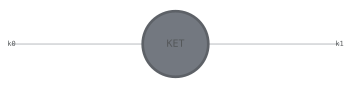

In [6]:
ket.draw()

In [7]:
X = qtn.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags=['PAULI', 'X', '0'])
Y = qtn.Tensor(qu.pauli('Y'), inds=('k1', 'b1'), tags=['PAULI', 'Y', '1'])

In [8]:
bra = qtn.Tensor(qu.rand_ket(4).reshape(2, 2), inds=('b0', 'b1'), tags=['BRA'])

In [9]:
TN = ket.H & X & Y & bra
print(TN)

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET'])),
    Tensor(shape=(2, 2), inds=('k0', 'b0'), tags=oset(['PAULI', 'X', '0'])),
    Tensor(shape=(2, 2), inds=('k1', 'b1'), tags=oset(['PAULI', 'Y', '1'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
], tensors=4, indices=4)


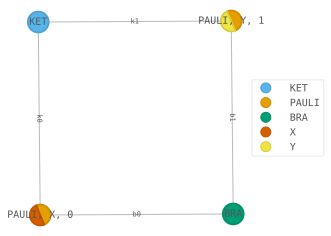

In [11]:
TN.draw(color=['KET', 'PAULI', 'BRA', 'X', 'Y'], figsize=(4, 4), show_inds='all')

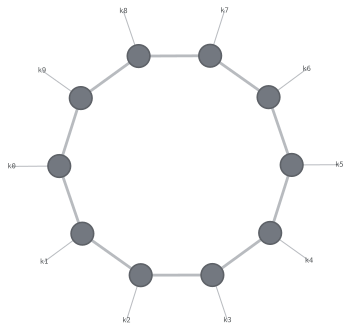

In [12]:
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor() for _ in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)

    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)

mps = qtn.TensorNetwork(tensors)
mps.draw()

In [13]:
TN ^ ...

(-0.041832068986823956+0.6255460948281898j)

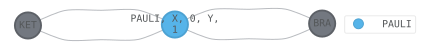

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
    Tensor(shape=(2, 2, 2, 2), inds=('k0', 'b0', 'k1', 'b1'), tags=oset(['PAULI', 'X', '0', 'Y', '1'])),
], tensors=3, indices=4)


In [14]:
TNc = TN ^ 'PAULI'
TNc.draw('PAULI')
print(TNc)

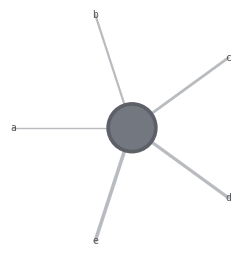

In [7]:
import quimb as qu
import quimb.tensor as qtn
t = qtn.rand_tensor([2, 3, 4, 5, 6], inds=['a', 'b', 'c', 'd', 'e'])
t.draw(figsize=(3, 3))

In [ ]:
tn = t.split(['a', 'c', 'd'])
tn.draw(figsize=(3, 3))